In [766]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.image as mpimg
import glob
import pandas as pd

In [774]:
images_cars = glob.glob('data/vehicles/*/*.png')
images_no_cars = glob.glob('data/non-vehicles/*/*.png')

print (len(images_cars))
print (len(images_no_cars))

8792
8968


In [776]:
images_cars  = np.concatenate([images_cars, images_cars])
print (len(images_cars))


17584


In [777]:
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict
    

In [778]:
data_info = data_look(images_cars, images_no_cars)
print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])

Your function returned a count of 17584  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


In [770]:
def plot_images(img1, img2):
    # Plot the examples
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(car_image)
    plt.title('Example Car Image')
    plt.subplot(122)
    plt.imshow(notcar_image)
    plt.title('Example Not-car Image')    
    

### Randomly draw car and non-car images

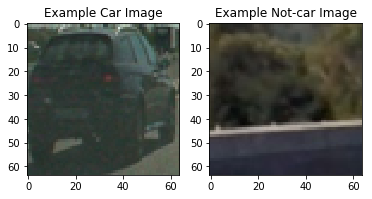

In [779]:
car_ind = np.random.randint(0, len(images_cars))
notcar_ind = np.random.randint(0, len(images_no_cars))
car_image = mpimg.imread(images_cars[car_ind])
notcar_image = mpimg.imread(images_no_cars[notcar_ind])
plot_images(car_image, notcar_image)

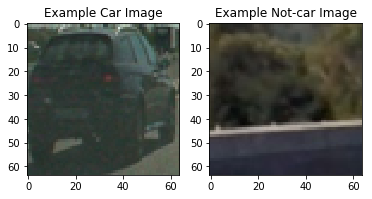

In [780]:
plot_images(car_image, notcar_image)

## 1. Define Bin features

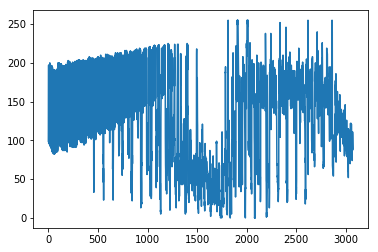

In [781]:
# Define a function to compute color histogram features  
# Pass the color_space flag as 3-letter all caps string
# like 'HSV' or 'LUV' etc.
# KEEP IN MIND IF YOU DECIDE TO USE THIS FUNCTION LATER
# IN YOUR PROJECT THAT IF YOU READ THE IMAGE WITH 
# cv2.imread() INSTEAD YOU START WITH BGR COLOR!
# Define a function to compute color histogram features  
# Pass the color_space flag as 3-letter all caps string
# like 'HSV' or 'LUV' etc.
def get_color_conv(color_space, img):
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    
    return feature_image
    
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    feature_image = get_color_conv(color_space, img)
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features
image = mpimg.imread('test_images/test1.jpg')
feature_vec = bin_spatial(image, color_space='RGB', size=(32, 32))

# Plot features
plt.plot(feature_vec)

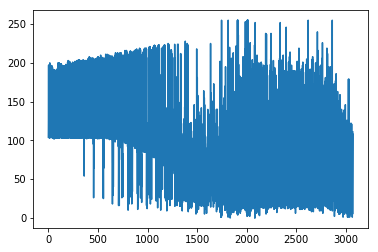

In [782]:
feature_vec = bin_spatial(image, color_space='HSV', size=(32, 32))
# Plot features
plt.plot(feature_vec)

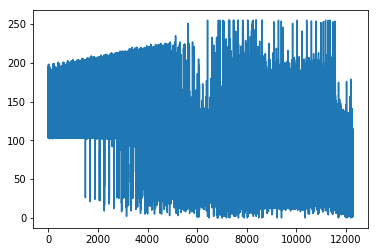

In [783]:
feature_vec = bin_spatial(image, color_space='HSV', size=(64, 64))
# Plot features
plt.plot(feature_vec)

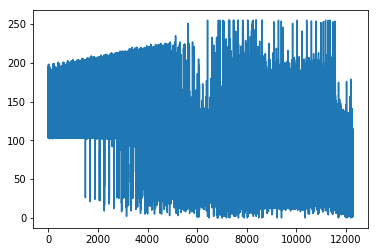

In [784]:
feature_vec = bin_spatial(image, color_space='HSV', size=(64, 64))
# Plot features
plt.plot(feature_vec)

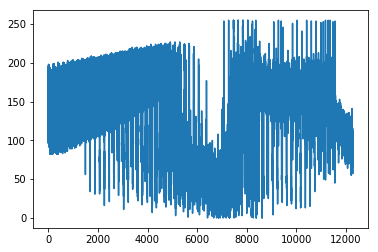

In [785]:
feature_vec = bin_spatial(image, color_space='RGB', size=(64, 64))

# Plot features
plt.plot(feature_vec)

## 2. Color histogram

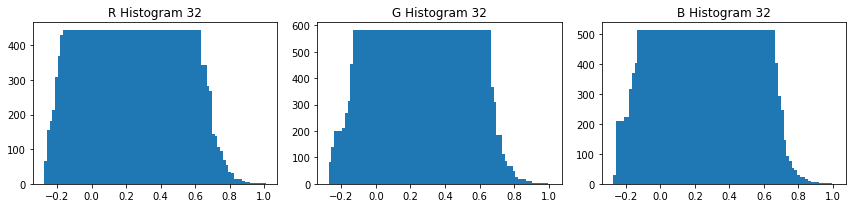

In [786]:
# Define a function to compute color histogram features  
def color_hist(image, nbins=32, bins_range=(0, 256)):
    # remove bins ranges for png files. 
    
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(image[:,:,0], bins=nbins)
    ghist = np.histogram(image[:,:,1], bins=nbins)
    bhist = np.histogram(image[:,:,2], bins=nbins) 
    
    # Generating bin centers
    bin_centers = None
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2    
    # Concatenate the histograms into a single feature vector
    hist_features = None
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features

image = mpimg.imread('test_images/test1.jpg')
image = mpimg.imread(images_cars[10])

rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

def plot_color_hist(rh, gh, bh, bincen, nbins, color_space):
    # Plot a figure with all three bar charts
    if rh is not None:
        fig = plt.figure(figsize=(12,3))
        plt.subplot(131)
        plt.bar(bincen, rh[0])
#         plt.xlim(0, 1)
        plt.title(color_space[0] + ' Histogram ' + str(nbins))
        plt.subplot(132)
        plt.bar(bincen, gh[0])
#         plt.xlim(0, 1)
        plt.title(color_space[1] + ' Histogram '+ str(nbins))
        plt.subplot(133)
        plt.bar(bincen, bh[0])
#         plt.xlim(0, 1)
        plt.title(color_space[2] + ' Histogram '+ str(nbins))
        fig.tight_layout()
    else:
        print('Your function is returning None for at least one variable...')
plot_color_hist(rh, gh, bh, bincen, 32, 'RGB')        

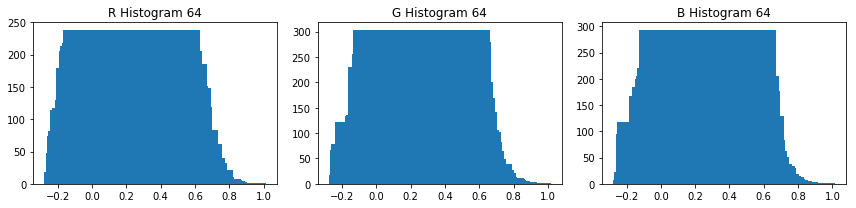

In [787]:
image = mpimg.imread(images_cars[10])
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=64, bins_range=(0, 256))
plot_color_hist(rh, gh, bh, bincen, 64, 'RGB') 

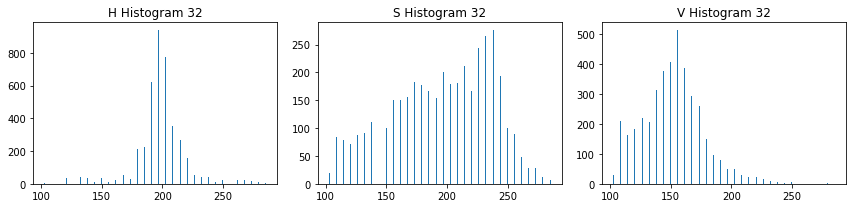

In [603]:
image = mpimg.imread(images_cars[10])
image = get_color_conv('HSV', image)
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))
plot_color_hist(rh, gh, bh, bincen, 32, "HSV") 

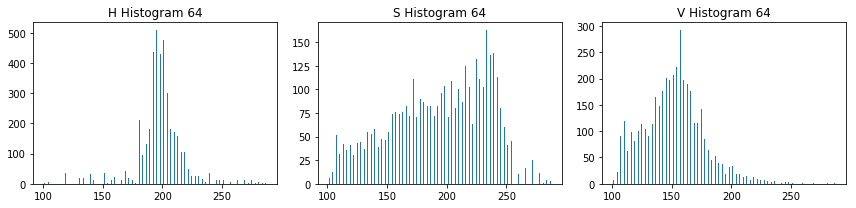

In [604]:
image = mpimg.imread(images_cars[10])
image = get_color_conv('HSV', image)
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=64, bins_range=(0, 256))
plot_color_hist(rh, gh, bh, bincen, 64, 'HSV') 

'S'

### 3. Hog Features

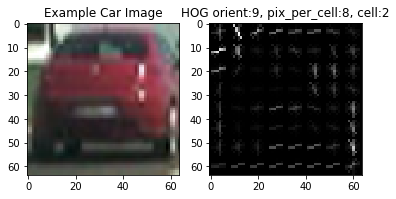

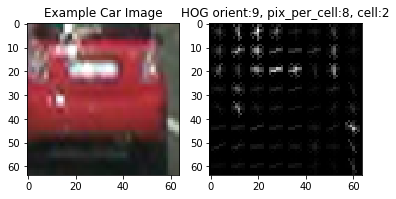

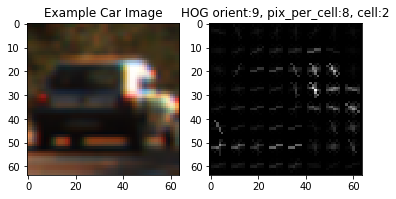

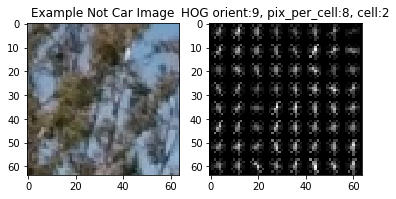

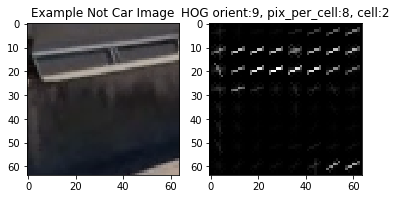

In [788]:
from skimage.feature import hog

# Define a function to return HOG features and visualization
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

def plot_hog_features(images_cars, title="Example Car Image"):
    # Generate a random index to look at a car image
    ind = np.random.randint(0, len(images_cars))
    # Read in the image
    image = mpimg.imread(images_cars[ind])
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Define HOG parameters
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(gray, orient, 
                            pix_per_cell, cell_per_block, 
                            vis=True, feature_vec=True)

    # Plot the examples
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.subplot(122)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG orient:' + str(orient) + ", pix_per_cell:" + str(pix_per_cell) + ', cell:' + str(cell_per_block))    
plot_hog_features(images_cars)    
plot_hog_features(images_cars)    
plot_hog_features(images_cars)    
plot_hog_features(images_no_cars, title="Example Not Car Image")    
plot_hog_features(images_no_cars, title="Example Not Car Image")    

## 4. Extract features from Color Hist and Bin
### 4.1 Normalize features

Using spatial binning of: 32 and 32 histogram bins
Extracting car features
Extracting not-car features
Normalizing features..
.done..


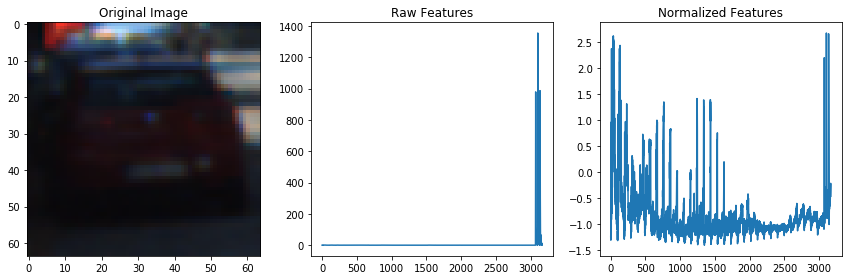

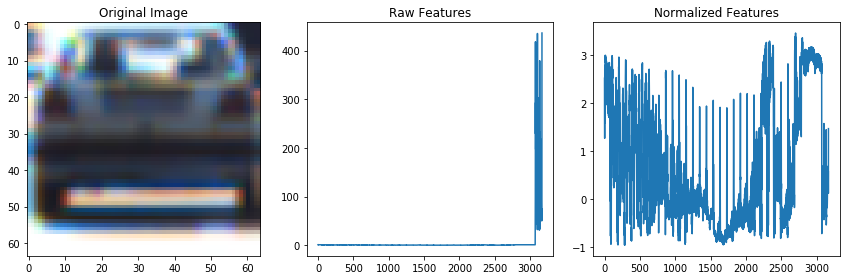

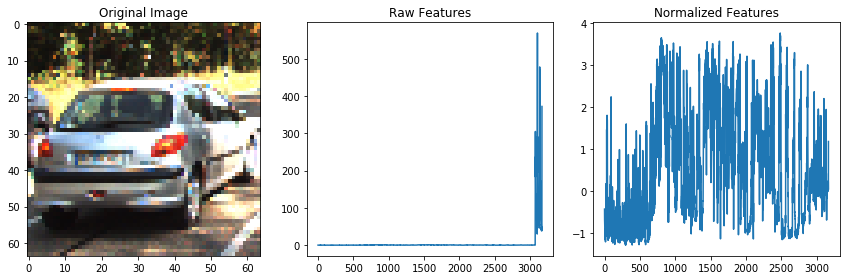

In [789]:
import pdb
from sklearn.preprocessing import StandardScaler

# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
        # Read in each one by one
        # apply color conversion if other than 'RGB'
        # Apply bin_spatial() to get spatial color features
        # Apply color_hist() to get color histogram features
        # Append the new feature vector to the features list
    for index, image_path in enumerate(imgs):
        print (index, end="\r")
        image = mpimg.imread(image_path)
        bin_features = bin_spatial(image)
        rh, gh, bh, bincen, histogram_features = color_hist(image)
        features.append(np.concatenate((bin_features, histogram_features)))
        

    # Return list of feature vectors
    return features

def normalize_features(car_features, notcar_features):
    # Create an array stack of feature vectors
    print ("Normalizing features..")
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    print (".done..")
    return X, scaled_X, X_scaler

def plot_normalized_features(cars, X, scaled_X):
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()


# TODO play with these values to see how your classifier
# performs under different binning scenarios
spatial = 32
histbin = 32    

print('Using spatial binning of:',spatial, 'and', histbin,'histogram bins')

print ("Extracting car features")
car_features = extract_features(images_cars, cspace='YCrCb', spatial_size=(spatial, spatial),
                        hist_bins=histbin, hist_range=(0, 256))
print ("Extracting not-car features")
notcar_features = extract_features(images_no_cars, cspace='YCrCb', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

X, scaled_X, X_scaler = normalize_features(car_features, notcar_features)    
# print('Feature vector length:', len(X_scaler[0]))
plot_normalized_features(images_cars, X, scaled_X)
plot_normalized_features(images_cars, X, scaled_X)
plot_normalized_features(images_cars, X, scaled_X)

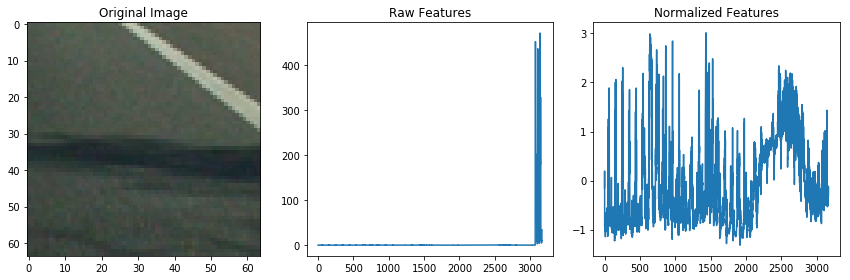

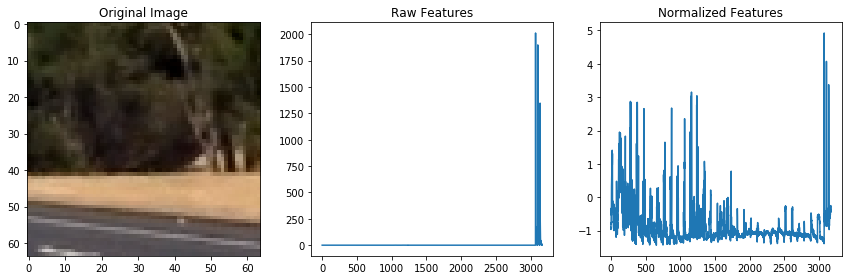

In [790]:
plot_normalized_features(images_no_cars, X, scaled_X)
plot_normalized_features(images_no_cars, X, scaled_X)

### 4.3 Training data prep.

In [791]:
# Define a labels vector based on features lists
y = np.hstack((np.ones(len(car_features)), 
              np.zeros(len(notcar_features))))
y_pd = pd.Series(y)
print (y_pd.value_counts())

1.0    17584
0.0     8968
dtype: int64


### 4.4 Train the models

In [792]:
from sklearn.model_selection import train_test_split

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

### 4.5. Linear SVC

In [793]:
from sklearn.svm import LinearSVC
def get_linear_svc():
    # Use a linear SVC (support vector classifier)
    svc = LinearSVC()
    # Train the SVC
    return svc

## Color Classify 

In [794]:
import time
svc = get_linear_svc()
print ("Fitting SVC..")
# Check the training time for the SVC
t=time.time()
print('Feature vector length:', len(X_train[0]))

svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Fitting SVC..
Feature vector length: 3168
36.92 Seconds to train SVC...
Test Accuracy of SVC =  0.9708
My SVC predicts:  [ 0.  1.  0.  0.  1.  1.  1.  1.  1.  1.]
For these 10 labels:  [ 0.  1.  0.  0.  1.  1.  1.  1.  1.  1.]
0.00171 Seconds to predict 10 labels with SVC


## 5. Extract HOG features 
### 5.1 Normalize features

In [795]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for index, file in enumerate(imgs):
        print (index, end="\r")
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        features.append(hog_features)
    # Return list of feature vectors
    return features

### TODO: Tweak these parameters and see how the results change.
colorspace = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_features(images_cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(images_no_cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))


97.15 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 5292


### 5.2 HOG Classify using SVC

In [796]:
# Use a linear SVC 
svc = get_linear_svc()
# Check the training time for the SVC
t=time.time()
print ("Fitting SVC... ")
print('Feature vector length:', len(X_train[0]))

svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print ("color space ", colorspace)
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Fitting SVC... 
Feature vector length: 5292
24.15 Seconds to train SVC...
color space  YCrCb
Test Accuracy of SVC =  0.9872
My SVC predicts:  [ 1.  1.  0.  1.  1.  1.  1.  0.  1.  0.]
For these 10 labels:  [ 1.  1.  0.  1.  1.  1.  1.  0.  1.  0.]
0.00182 Seconds to predict 10 labels with SVC


## 6. Sliding window

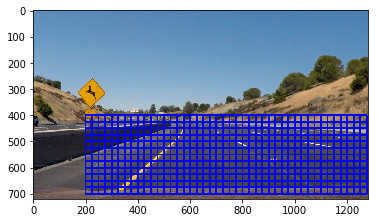

In [797]:
# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]

    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]

    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))    
    # Compute the number of pixels per step in x/y
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    #     Note: you could vectorize this step, but in practice
    #     you'll be considering windows one by one with your
    #     classifier, so looping makes sense
        # Calculate each window position
        # Append window position to list
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list        
    # Return the list of windows

image = mpimg.imread('test_images/test2.jpg')

    
windows = slide_window(image, x_start_stop=[200, None], y_start_stop=[400, 700], 
                    xy_window=(50, 50), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

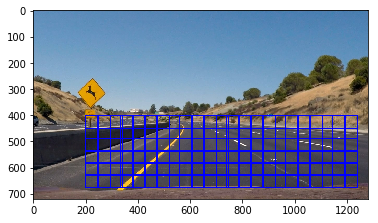

In [798]:
windows = slide_window(image, x_start_stop=[200, None], y_start_stop=[400, 700], 
                    xy_window=(50, 50), xy_overlap=(0.1, 0.1))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=2)                    
plt.imshow(window_img)

## 7. Combine all features

In [799]:
def get_color_space_image(image, color_space):
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(image)      

    return feature_image
    
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_spaces=['RGB'], spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    print ("color_space:" + "_colors_".join(color_spaces) + ", spatial_feat:"+ str(spatial_feat) + \
           ", hist_feat:" + str( hist_feat) + ", hog_feat:" + str(hog_feat))
    print ("hog_channel:" + str(hog_channel))
    features = []
    # Iterate through the list of images
    for index, file in enumerate(imgs):
        print (str(index), end='\r')
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        img_color_features = []
        for color_space in color_spaces:
            img_features = single_img_features(
                image, color_space=color_space, 
                spatial_size=spatial_size, hist_bins=hist_bins, orient=orient, 
                pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                hog_channel=hog_channel,spatial_feat=spatial_feat, hist_feat=hist_feat, 
                hog_feat=hog_feat
            )
#             pdb.set_trace()
            img_color_features.append(img_features)
#         pdb.set_trace()
        features.append(np.concatenate(img_color_features))
    # Return list of feature vectors
    return features

def single_img_features(image, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    feature_image = get_color_space_image(image, color_space)    
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        rhist, ghist, bhist, bin_centers, hist_features = color_hist(feature_image, 
                                                                     nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)




## 7.2 Extract combine features

In [800]:
### TODO: Tweak these parameters and see how the results change.
color_spaces = ['YCrCb', 'RGB', 'HLS'] #'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
#color_spaces = ['HLS'] #'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb

orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()


print ("Extracting car images features...")
car_features = extract_features(images_cars, color_spaces=color_spaces, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
print ("Extracting non car images features...")
notcar_features = extract_features(images_no_cars, color_spaces=color_spaces, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

print ("done")
print (len(notcar_features))
print (len(car_features))
print (notcar_features[0].shape)
print (car_features[0].shape)

Extracting car images features...
color_space:YCrCb_colors_RGB_colors_HLS, spatial_feat:True, hist_feat:True, hog_feat:True
hog_channel:ALL
Extracting non car images features...
color_space:YCrCb_colors_RGB_colors_HLS, spatial_feat:True, hist_feat:True, hog_feat:True
hog_channel:ALL
done
8968
17584
(25380,)
(25380,)


## 7.3 Set up data for training

In [801]:
len(images_cars)

17584

In [802]:
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
print ("Scalling..")
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))


Scalling..
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 25380


## 7.4 Traing the model

In [803]:
# Use a linear SVC 
svc = get_linear_svc()
# Check the training time for the SVC
t=time.time()
print ("fitting..")
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

fitting..
124.28 Seconds to train SVC...
Test Accuracy of SVC =  0.9974


## 8 Search Windows

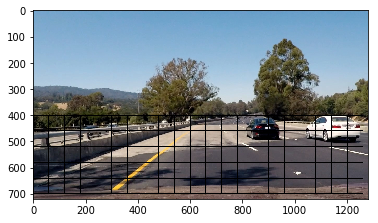

In [805]:
def search_windows(img, windows, clf, scaler, color_spaces='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        image_color_features = []
        for color_space in color_spaces:
            img_color_feat = single_img_features(test_img, color_space=color_space, 
                                spatial_size=spatial_size, hist_bins=hist_bins, 
                                orient=orient, pix_per_cell=pix_per_cell, 
                                cell_per_block=cell_per_block, 
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)
            image_color_features.append(img_color_feat)
        features = np.concatenate(image_color_features)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

image = mpimg.imread('test_images/test4.jpg')

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)

image = image.astype(np.float32)/255
draw_image = np.copy(image)


windows = slide_window(draw_image, x_start_stop=[None, None], y_start_stop=[400, None], 
                    xy_window=(120, 120), xy_overlap=(0.5, 0.5))

window_img = draw_boxes(draw_image, windows, color=(0, 0, 255), thick=2)                    
plt.imshow(window_img)



In [51]:
image.shape

(720, 1280, 3)

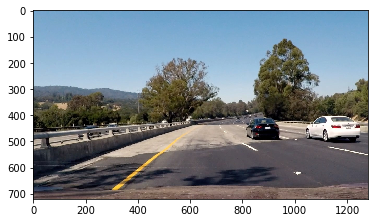

In [806]:
color_spaces = ['YCrCb', 'RGB', 'HLS']
hot_windows = search_windows(image, windows, svc, X_scaler, color_spaces=color_spaces, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       
draw_image = np.copy(image)
window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)

# 9. Hog sub-sampling window search

In [809]:
# Define a single function that can extract features using hog sub-sampling and make predictions

def get_color_space_image(image, color_space):
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(image)      

    return feature_image


def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins,
             normalize_img_format=True, draw_img=None, color=(0,255,255),
             color_spaces=color_spaces):
    
    img_normalized = np.copy(img)
    if normalize_img_format:
        img_normalized = img_normalized.astype(np.float32)/255
    
    if draw_img == None:
        draw_img = np.copy(img)
    
    img_tosearch = img_normalized[ystart:ystop,:,:]
#     pdb.set_trace()
    x_start = 300
    img_tosearch = img_tosearch[:,x_start:,:]
    
    color_ctrans_tosearch = []
    
    for index, color_space in enumerate(color_spaces):
        ctrans_tosearch = get_color_space_image(img_tosearch, color_space)
        if scale != 1:
            imshape = ctrans_tosearch.shape
            ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        color_ctrans_tosearch.append(ctrans_tosearch)
        
    ch1 = color_ctrans_tosearch[0][:,:,0]
    ch2 = color_ctrans_tosearch[0][:,:,1]
    ch3 = color_ctrans_tosearch[0][:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    color_hogs = []
    for index, color_space in enumerate(color_spaces):
        ch1 = color_ctrans_tosearch[index][:,:,0]
        ch2 = color_ctrans_tosearch[index][:,:,1]
        ch3 = color_ctrans_tosearch[index][:,:,2]        
        # Compute individual channel HOG features for the entire image
        hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
        color_hogs.append([hog1, hog2, hog3])
    
    on_windows = []
    off_windows = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            image_color_features = []
            for index, color_space in enumerate(color_spaces):
#                 print (color_space, end='\r')
                # Extract HOG for this patch
                hog1, hog2, hog3 = color_hogs[index]
                hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

                xleft = xpos*pix_per_cell
                ytop = ypos*pix_per_cell

                # Extract the image patch
                subimg = cv2.resize(color_ctrans_tosearch[index][ytop:ytop+window, xleft:xleft+window], (64,64))

                # Get color features
                spatial_features = bin_spatial(subimg, size=spatial_size)
                rhist, ghist, bhist, bin_centers, hist_features = color_hist(subimg, nbins=hist_bins)
                image_color_features.append(np.hstack((spatial_features, hist_features, hog_features)))
                                      
            all_color_features = np.concatenate(image_color_features)
            # Scale features and make a prediction
            test_features = X_scaler.transform(all_color_features).reshape(1, -1)    
            test_prediction = svc.predict(test_features)

            xbox_left = np.int(xleft*scale)
            ytop_draw = np.int(ytop*scale)
            win_draw = np.int(window*scale)

            if test_prediction == 1:
                on_windows.append([
                              (xbox_left + x_start, ytop_draw + ystart),
                              (xbox_left + win_draw + x_start, ytop_draw + win_draw + ystart)])
            else:
                off_windows.append([
                              (xbox_left + x_start, ytop_draw + ystart),
                              (xbox_left + win_draw + x_start, ytop_draw + win_draw + ystart)])
    for off_win in off_windows:    
        left, right = off_win
        cv2.rectangle(draw_img,
                      (left[0], left[1]),
                      (right[0], right[1]), 
                      color , 4) 

    for oon_win in on_windows:        
        left, right = oon_win
        cv2.rectangle(draw_img,
                      (left[0], left[1]),
                      (right[0], right[1]), 
                      (0,0,255) , 3) 
        
    return draw_img, on_windows
    



In [810]:

ystart = 400
ystop = 700
scale = 1.5
color_spaces = ['YCrCb', 'RGB', 'HLS']
#color_space = 'YCrCb' #'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins


images_cars = glob.glob('test_images/*.jpg')

scales_ranges = [1, 1.5, 1.75, 2.0]
out_images = []
for image_path in images_cars:
    image = mpimg.imread(image_path)
    for scales in scales_ranges:
        draw_image = np.copy(image)
        out_img, bbxoes = find_cars(draw_image, ystart, ystop, scales, svc, X_scaler, orient, pix_per_cell,
                                    cell_per_block, spatial_size, hist_bins, normalize_img_format=True,
                                   color_spaces=color_spaces)
        out_images.append(out_img)



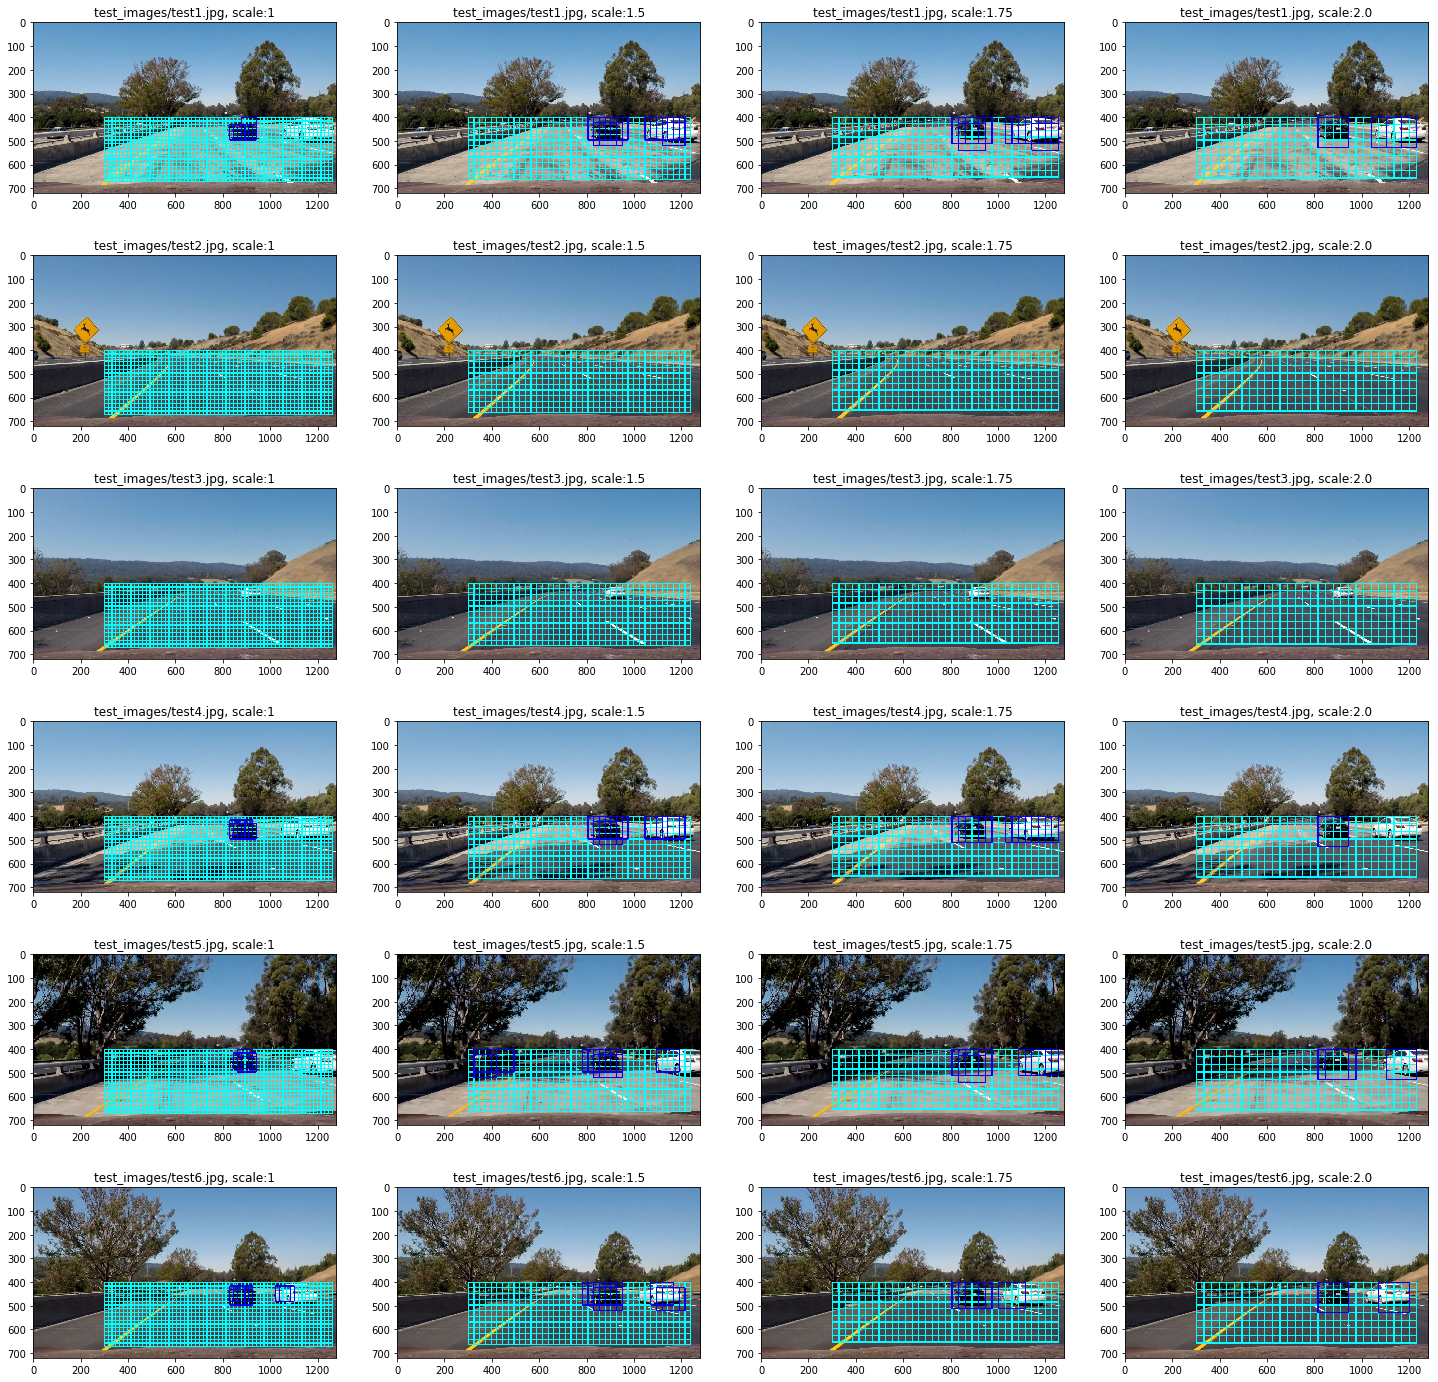

In [811]:
def plot_sub_plots(images, images_cars, scales_ranges, per_cols = 3):
    if len(images) % per_cols == 0:
        rows= len(images) // per_cols
    else:
        rows = (len(images) // per_cols) + 1
    f, axes = plt.subplots(rows, per_cols, figsize=(25,25))
    
    for row_index in range(rows):
        for col_index in range(per_cols):
            img_index = col_index + row_index * per_cols
            if (img_index < len(images)):
                axes[row_index, col_index].set_title(images_cars[row_index] + ", scale:"+ str(scales_ranges[col_index]))
                axes[row_index, col_index].imshow(images[img_index])
                                
plot_sub_plots(out_images, images_cars, scales_ranges, per_cols=len(scales_ranges))

In [812]:
def find_cars_scaled(img, ystart, ystop, scale_far, scale_close, 
                     svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins,
                     normalize_img_format=True, plot_debug=False, color_spaces=color_spaces, image_path=""):
    
    img_normalized = np.copy(img)
    
    y_mid = (ystart + ystop) // 2

#     y_mid = 425
    draw_img1, on_windows_close = find_cars(img, ystart, y_mid+25, scale_far, svc, X_scaler, orient, 
              pix_per_cell, cell_per_block, 
              spatial_size, hist_bins, normalize_img_format=normalize_img_format, draw_img=np.copy(img), 
              color=(0,255,255), color_spaces=color_spaces)

    far_scaling = "Scale far: " + "{:0.2f}".format(scale_far)
    far_close = "Scale close: " + "{:0.2f}".format(scale_close)
    fontScale=1
    thickness=2
    fontFace = cv2.FONT_ITALIC


    cv2.putText(draw_img1, far_scaling, (10, 50), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)    
    # y_mid + 25
    draw_img2, on_windows_far = find_cars(img, ystart,  y_mid+125, scale_close, svc, X_scaler, orient, 
              pix_per_cell, cell_per_block, 
              spatial_size, hist_bins, normalize_img_format=normalize_img_format, draw_img=np.copy(img), 
                                          color=(255,0,255))
    cv2.putText(draw_img2, far_close, (10, 100), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)    

    on_windows = []
    
    draw_img = np.copy(img)
    for boxes in on_windows_far:
        on_windows.append(boxes)
        first, second = boxes
        xbox_left, y_top = first 
        x_right, y_down = second
        cv2.rectangle(draw_img,(xbox_left, y_top), (x_right, y_down), (255,0,0) , 3) 

    for boxes in on_windows_close:
        on_windows.append(boxes)
        first, second = boxes
        xbox_left, y_top = first 
        x_right, y_down = second
        cv2.rectangle(draw_img,(xbox_left, y_top), (x_right, y_down), (255,0,0) , 3) 

    if plot_debug:    
        f, axes = plt.subplots(1, 3, figsize=(20,20))
        axes[0].imshow(draw_img1)
        axes[0].set_title("Output from scale far")
        axes[1].imshow(draw_img2)
        axes[1].set_title("Output from scale close")
        axes[2].imshow(draw_img)
        axes[2].set_title("Detected vehicle")
#         plt.savefig("./output_images/" + image_path)
        
    return draw_img1, draw_img2, draw_img, on_windows

        


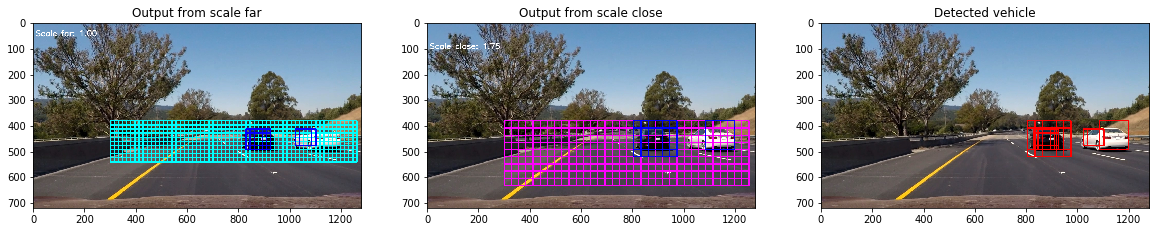

In [813]:
image = mpimg.imread("test_images/test6.jpg")
ystart = 380
ystop = 700

_ = find_cars_scaled(image, ystart, ystop, 1, 1.75, svc, X_scaler, orient, pix_per_cell,
                                    cell_per_block, spatial_size, hist_bins, normalize_img_format=True, 
                     plot_debug=True, color_spaces=color_spaces)

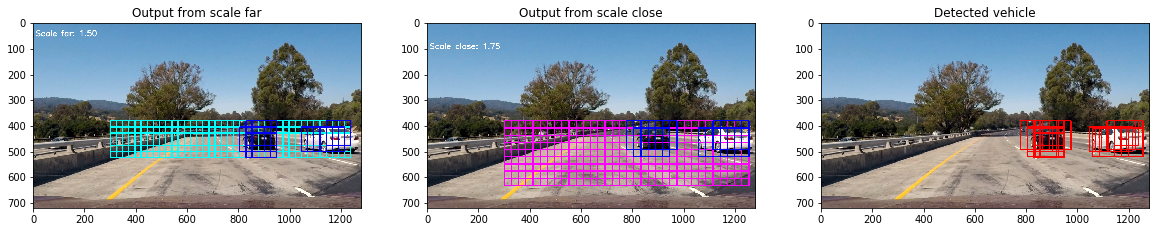

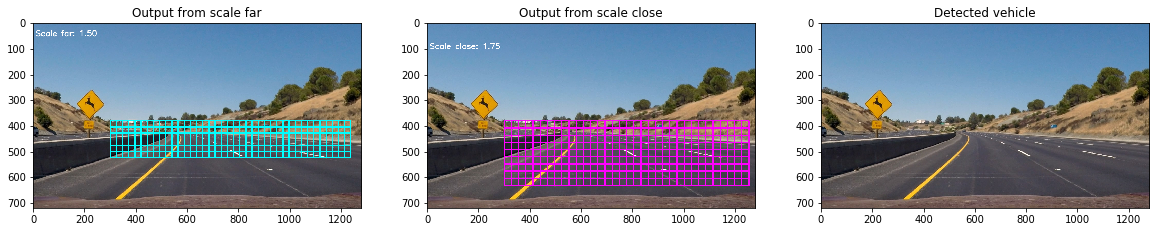

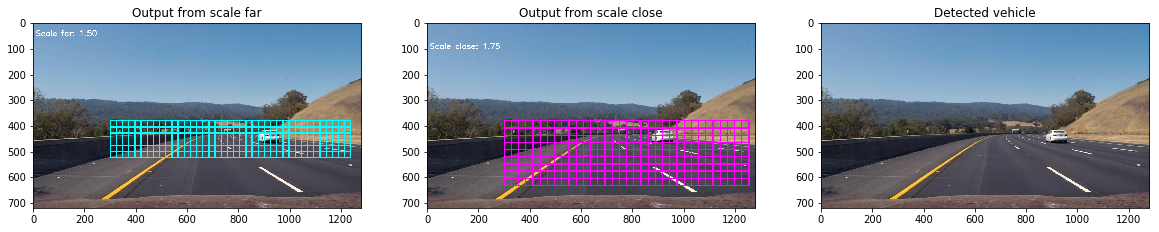

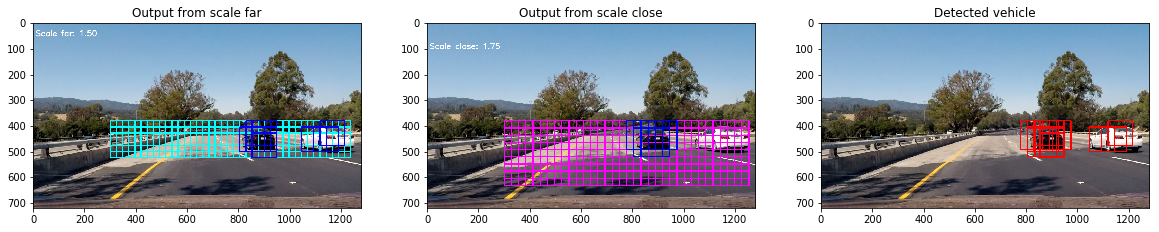

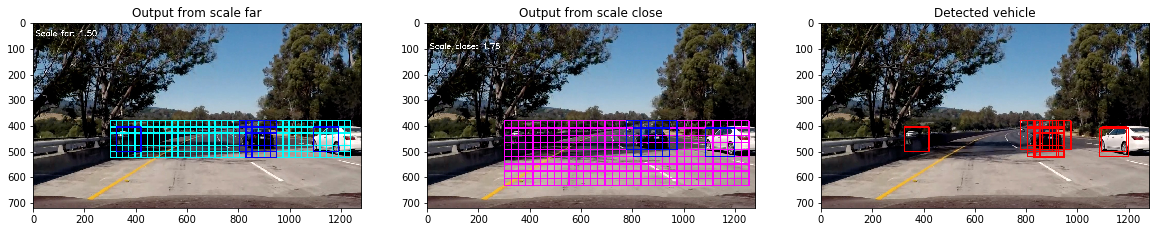

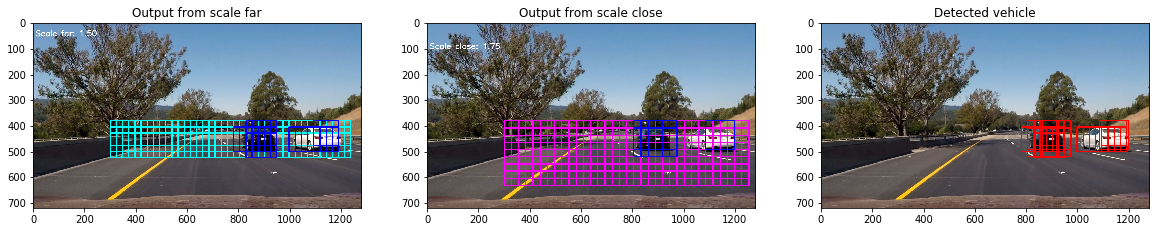

In [814]:
test_images_cars = glob.glob('test_images/*.jpg')
for image_path in test_images_cars:
    image = mpimg.imread(image_path)
    _ = find_cars_scaled(image, ystart, ystop, 1.5, 1.75, svc, X_scaler, orient, pix_per_cell,
                                        cell_per_block, spatial_size, hist_bins, normalize_img_format=True, 
                         plot_debug=True, color_spaces=color_spaces, image_path=image_path.split("/")[1] + "_predict.png")

In [514]:
scaled_image, _, _, bbxoes  = find_cars_scaled(image, ystart, ystop, 1, 1.5, svc, X_scaler, orient, pix_per_cell,
                                    cell_per_block, spatial_size, hist_bins, normalize_img_format=True, 
                                         color_spaces=color_spaces)

# 10. False positive and Multiple detection

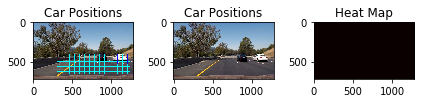

In [815]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

# Read in image similar to one shown above 

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes

    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

heat = np.zeros_like(image[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat, bbxoes)
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)    

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img_1 = draw_labeled_bboxes(out_img, labels)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(131)
plt.imshow(out_img)
plt.title('Car Positions')

plt.subplot(132)
plt.imshow(draw_img)
plt.title('Car Positions')

plt.subplot(133)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

380
test_images/test1.jpg
test_images/test2.jpg
test_images/test3.jpg
test_images/test4.jpg
test_images/test5.jpg
test_images/test6.jpg


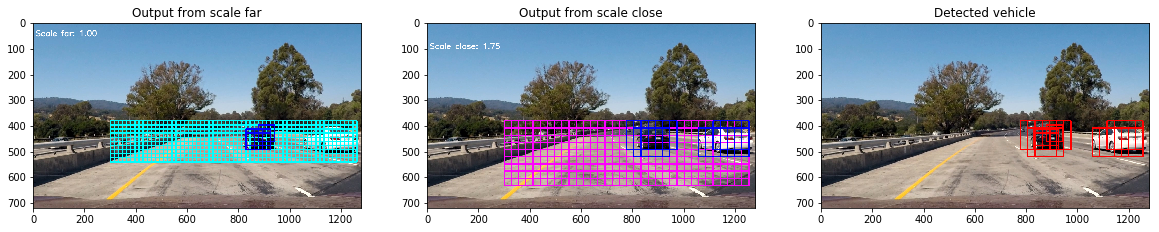

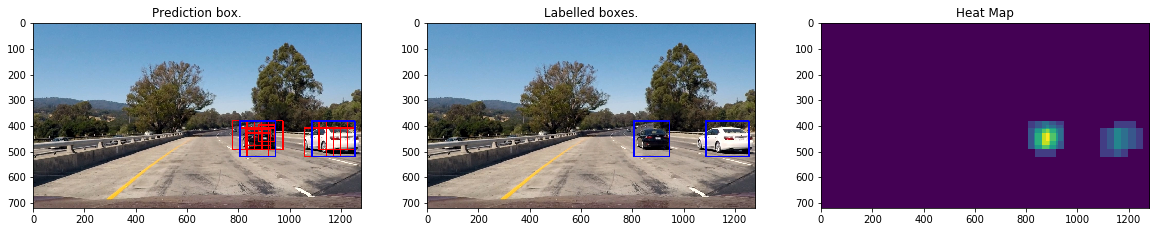

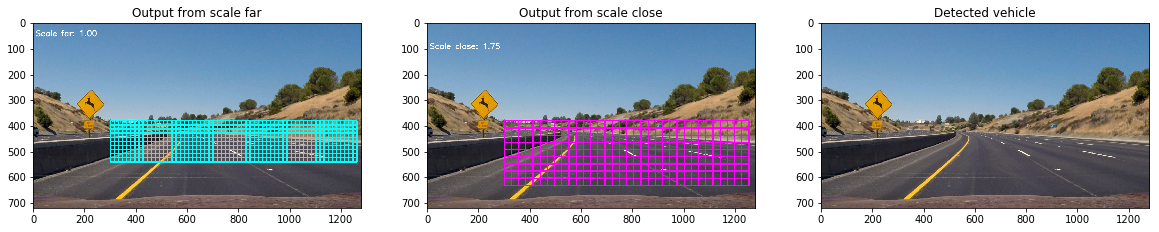

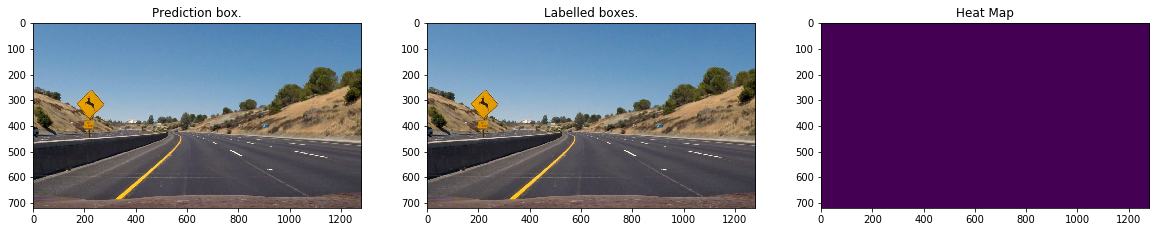

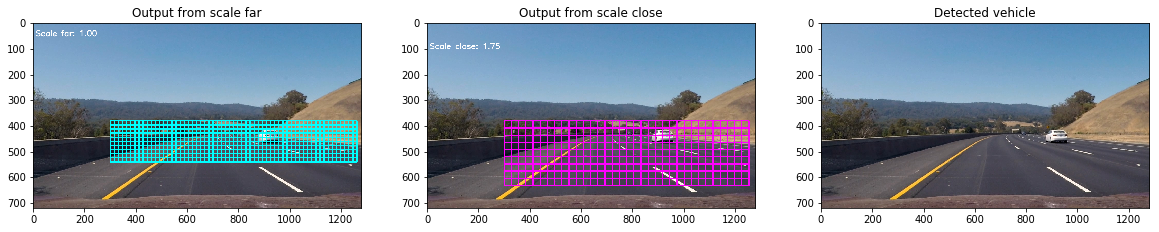

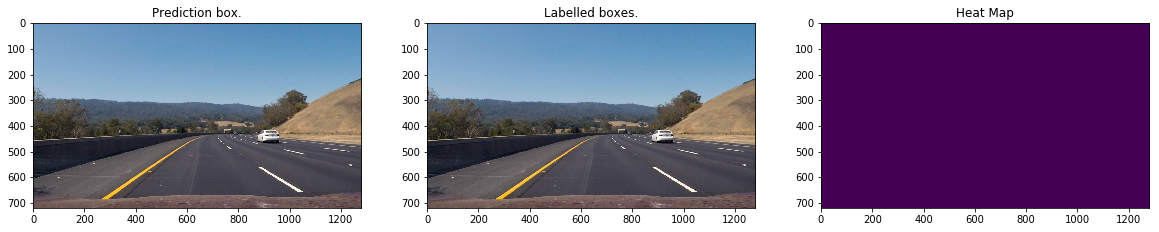

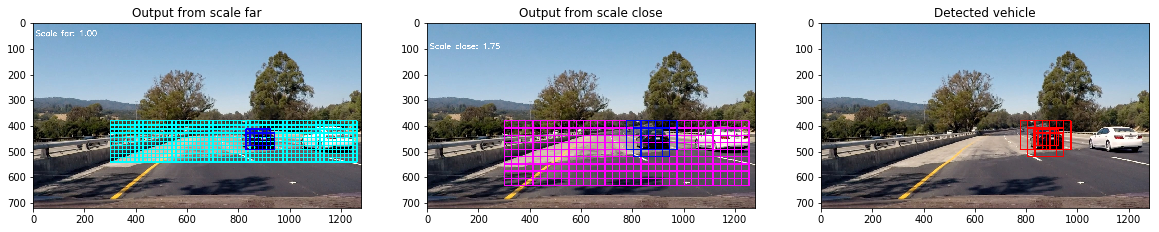

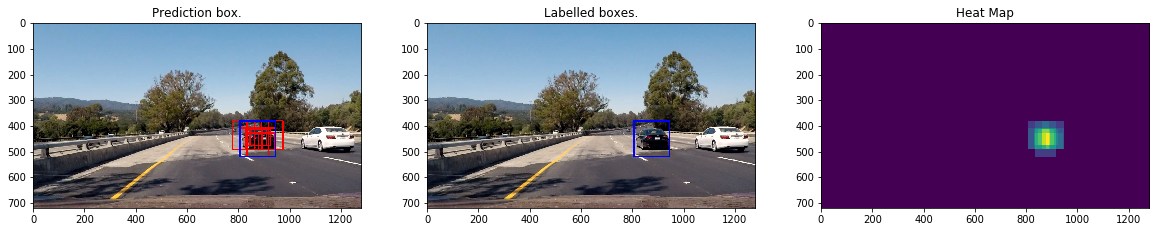

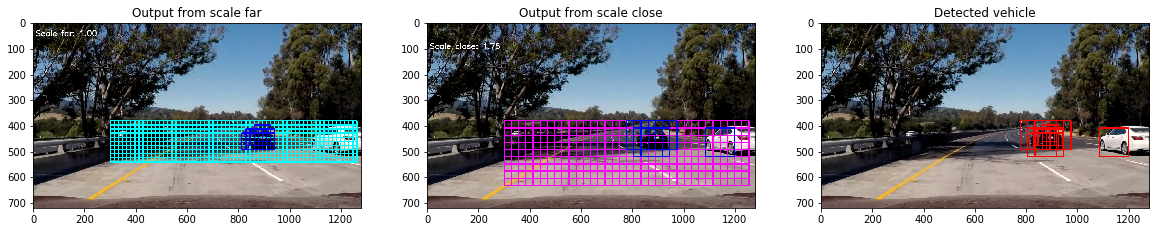

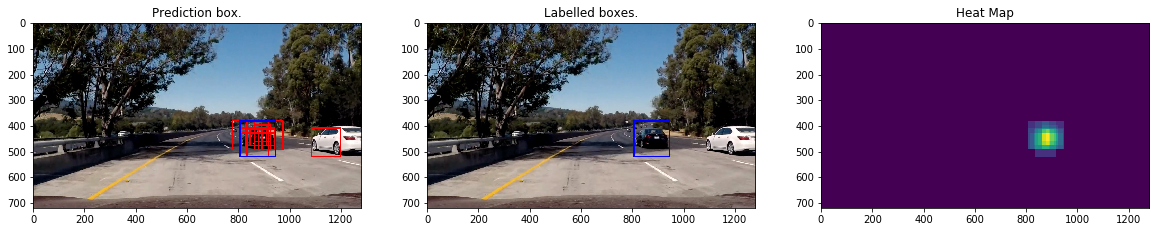

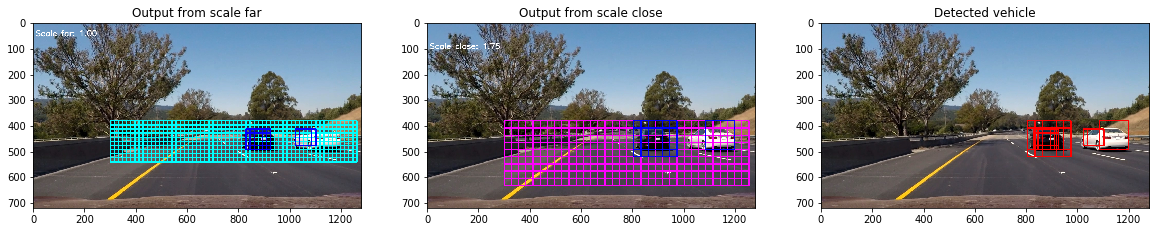

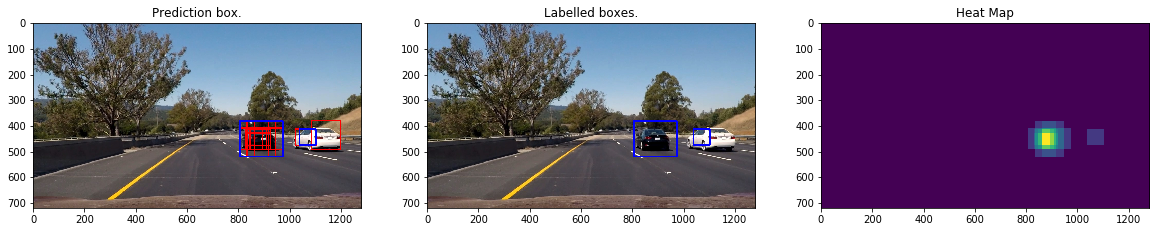

In [816]:
test_images_cars = glob.glob('test_images/*.jpg')
print (ystart)
for image_path in test_images_cars:
    print (image_path)
    image = mpimg.imread(image_path)
    draw_img1, draw_img2, draw_img, on_windows = find_cars_scaled(image, ystart, ystop, 1.0, 1.75, svc, X_scaler, orient, pix_per_cell,
                                cell_per_block, spatial_size, hist_bins, normalize_img_format=True, 
                         plot_debug=True, color_spaces=color_spaces, image_path=image_path.split("/")[1] + "_predict_.png")
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    
    heat = add_heat(heat, on_windows)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat, 1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)    

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img_1 = draw_labeled_bboxes(draw_img, labels)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    f, axes = plt.subplots(1, 3, figsize=(20,20))
    axes[0].imshow(draw_img_1)
    axes[0].set_title("Prediction box.")
    axes[1].imshow(draw_img)
    axes[1].set_title("Labelled boxes.")
    axes[2].imshow(heatmap)
    axes[2].set_title("Heat Map")
#     fig.tight_layout()
#     plt.savefig("./output_images/heat_map_" + image_path.split("/")[1] , dpi=199)


# 11. Pipeline to cross validate best Model

- Try Linear SVM
- Try Radial etc SVM
- Try Decision Tree
- Random forest
- Conv. Neural net

In [97]:
from sklearn.svm import LinearSVC
def get_linear_svc():
    # Use a linear SVC (support vector classifier)
    return LinearSVC()

def get_kener_svc(kernel):
    #for kernel in ('linear', 'poly', 'rbf'):
    return  svm.SVC(kernel=kernel, gamma=2)

def get_linear_scv_kernel():
    return get_kener_svc('linear')

def get_linear_scv_kernel():
    return get_kener_svc('poly')

def get_linear_scv_kernel():
    return get_kener_svc('rbf')


In [100]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [98]:
def h(p, q):
    return (p, q)

In [101]:
interact(h, p=5, q=fixed(20));

(5, 20)

In [105]:
interact(h, p=widgets.IntSlider(min=-10,max=30,step=1,value=10), q=fixed(20));


(25, 20)

In [69]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [651]:
def compose_debug_images(debug_images):
    HEIGHT = 1024
    WIDTH = 576
    images_per_row = 3    
    total_images = len(debug_images)
    if total_images % images_per_row == 0:
        total_rows = (int)(total_images/images_per_row)
    else:    
        total_rows = (int)(total_images/images_per_row) + 1
    
    img_out= np.zeros((WIDTH, HEIGHT, 3), dtype=np.float32)

    per_image_width = (int)(WIDTH/images_per_row)
    per_image_height = (int)(HEIGHT/total_rows)
    
    index = 0
    for row in range(total_rows):
        for col in range(images_per_row):
            if (index >= (total_images)):
                continue
            cur_image = debug_images[index]    
            if len(cur_image.shape) == 2:
                cur_img_resize = cv2.resize(cur_image,(per_image_height,per_image_width)).astype(np.uint8)        
                img_out[col * per_image_width: (col + 1) * per_image_width, row * per_image_height : (row + 1) * per_image_height, 0] = cur_img_resize
                img_out[col * per_image_width: (col + 1) * per_image_width, row * per_image_height : (row + 1) * per_image_height, 0] = cur_img_resize
                img_out[col * per_image_width: (col + 1) * per_image_width, row * per_image_height : (row + 1) * per_image_height, 0] = cur_img_resize
            else:
                cur_img_resize = cv2.resize(cur_image,(per_image_height,per_image_width)).astype(np.float)         
                img_out[col * per_image_width: (col + 1) * per_image_width, row * per_image_height : (row + 1) * per_image_height,  :] = cur_img_resize
            index += 1
    return img_out

In [764]:
threshold = 1
color_spaces = ['YCrCb', 'RGB', 'HLS']    
far_scaling = 1.0
close_scaling = 1.75
def process_image_detect_vehicle(image_org):
    global threshold
    global color_spaces
    global far_scaling
    global close_scaling
    ystart = 380
    ystop = 700

    #color_spaces = 'YCrCb' #'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    orient = 9  # HOG orientations
    pix_per_cell = 8 # HOG pixels per cell
    cell_per_block = 2 # HOG cells per block
    spatial_size = (32, 32) # Spatial binning dimensions
    hist_bins = 32    # Number of histogram bins

    debug_images = []
    
    debug_images.append(image_org)
    d1, d2, out_img, bbxoes = find_cars_scaled(image_org, ystart, ystop, far_scaling, close_scaling, svc, X_scaler, orient, 
                                pix_per_cell,
                                cell_per_block, spatial_size, hist_bins, color_spaces=color_spaces)
    debug_images.append(d1)
    debug_images.append(d2)
    debug_images.append(out_img)
    
    heat = np.zeros_like(image[:,:,0]).astype(np.float)    
    heat = add_heat(heat, bbxoes)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat, threshold)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255) 
    
    heatMapInt = cv2.equalizeHist(heatmap.astype(np.uint8))
    heatColor = cv2.applyColorMap(heatMapInt, cv2.COLORMAP_JET)
    heatColor = cv2.cvtColor(heatColor, code=cv2.COLOR_BGR2RGB)
    debug_images.append(heatColor)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image_org), labels)
    debug_images.append(draw_img)
    
    fontScale=1
    thickness=2
    fontFace = cv2.FONT_ITALIC
    
    far_scaling_t = "Scale far: " + "{:0.2f}".format(far_scaling)
    far_close_t = "Scale close: " + "{:0.2f}".format(close_scaling)
    
    cv2.putText(draw_img, str(far_scaling_t), (10, 50), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)    
    cv2.putText(draw_img, str(far_close_t), (10, 100), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)    
    cv2.putText(draw_img, "_color_".join(color_spaces), (10, 150), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)    
    
    debugged_image = compose_debug_images(debug_images)
    
    return debugged_image

test_images/test3.jpg


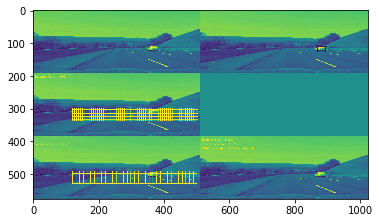

In [751]:
test_images_cars = glob.glob('test_images/test3.jpg')
for image_path in test_images_cars:
    print (image_path)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    out_img = process_image_detect_vehicle(image)
    plt.imshow(out_img[:,:, 2])
#     cv2.imshow(out_img, cmap='gray')

In [758]:
out_videos_dir  = 'out_videos/'
def get_out_keys():
    global threshold
    global color_spaces
    
    return out_videos_dir  + "_color_".join(color_spaces) + "_threhold_"+ str(threshold) + "_scale_" + \
        str(far_scaling) + "_" + str(close_scaling) + "_"

get_out_keys()

'out_videos/YCrCb_color_RGB_color_HLS_threhold_1_scale_1.0_1.75_'

In [765]:
white_output = get_out_keys()  + 'project_video_white_detect_out.mp4'
clip1 = VideoFileClip("project_video_white_detect.mp4")
white_clip = clip1.fl_image(process_image_detect_vehicle) # NOTE: this function expects color images!!
white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video out_videos/YCrCb_color_RGB_color_HLS_threhold_1_scale_1.0_1.75_project_video_white_detect_out.mp4
[MoviePy] Writing video out_videos/YCrCb_color_RGB_color_HLS_threhold_1_scale_1.0_1.75_project_video_white_detect_out.mp4


 99%|█████████▉| 142/143 [04:06<00:01,  1.73s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: out_videos/YCrCb_color_RGB_color_HLS_threhold_1_scale_1.0_1.75_project_video_white_detect_out.mp4 



In [523]:
white_output = get_out_keys()  + 'project_video_out_small_3_colors.mp4'
clip1 = VideoFileClip("project_video_small.mp4")
white_clip = clip1.fl_image(process_image_detect_vehicle) #NOTE: this function expects color images!!
white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video project_video_out_small_3_colors.mp4
[MoviePy] Writing video project_video_out_small_3_colors.mp4



100%|█████████▉| 319/320 [08:42<00:01,  1.65s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_out_small_3_colors.mp4 



In [698]:
white_output = get_out_keys()  + 'project_video_out_multi_scale_merge_mid_merge_3_colors_debug.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image_detect_vehicle) #NOTE: this function expects color images!!
white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video out_videos/YCrCb_color_RGB_color_HLS_threhold_0_project_video_out_multi_scale_merge_mid_merge_3_colors_debug.mp4
[MoviePy] Writing video out_videos/YCrCb_color_RGB_color_HLS_threhold_0_project_video_out_multi_scale_merge_mid_merge_3_colors_debug.mp4


 14%|█▍        | 175/1261 [03:42<23:54,  1.32s/it]

KeyboardInterrupt: 